In [34]:
from glob import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

gen_types = {
    'cascade': 'Hydro',
    'hydro': 'Hydro',
    'wind': 'Wind',
    'solar': 'Solar',
    'Wind': 'Wind',
    'Solar': 'Solar',
    'NG': 'Gas',
    'biomass': 'Biomass'
}

colors = {
    'cascade': '#a1c5ff',
    'hydro': '#a1c5ff',
    'wind': '#a9d6ae',
    'solar': '#fcfba9',
    'Wind': '#a9d6ae',
    'Solar': '#fcfba9',
    'NG': '#a3a3a3',
    'biomass': '#a8b3a2'
}

def fixpath(path):
    if path.startswith("C:"): return "/mnt/c/" + path.replace("\\", "/")[3:]
    else:
        pass
    return path

plt.rc('lines', linewidth=0.75)

output_dir = fixpath(r"C:\Users\smoha\OneDrive - University of Victoria\Project\tasks\linkage_hydro\pre_analysis")
os.chdir(output_dir)

scenarios = pd.DataFrame(glob('*.xlsx', recursive=True))
print(scenarios)
scenario = scenarios.iat[int(input("Insert scenario number:\n")),0]

                                                    0
0                     analysis_BC_Cascade_scen01.xlsx
1                     analysis_BC_Cascade_scen04.xlsx
2              analysis_BC_Cascade_tk_capacities.xlsx
3   analysis_BC_Cascade_tk_capacities_minhourlycf....
4                     analysis_BC_Cascade_tk_vre.xlsx
5                             analysis_BC_scen03.xlsx
6                      analysis_BC_tk_capacities.xlsx
7           analysis_BC_tk_capacities_saf_demand.xlsx
8                     analysis_SILVER_BC_Cascade.xlsx
9                          analysis_SILVER_HYDRO.xlsx
10                   hydro_hourly_dissagregation.xlsx


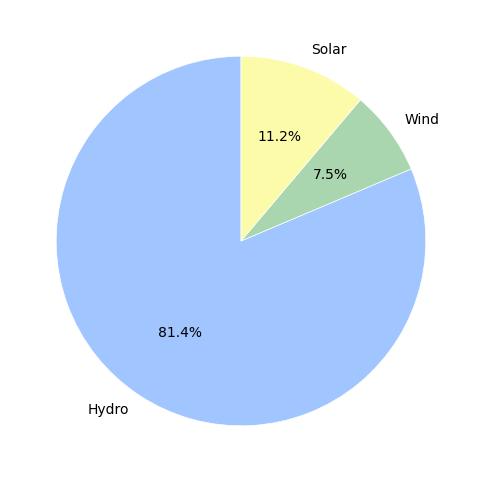

In [35]:
#Pie chart for the total generation

total_generation = pd.read_excel(scenario,sheet_name='Total Dispatch' , index_col=0)
yearly_total_generation = total_generation.loc['total']
if 'cascade' in yearly_total_generation.index:
        yearly_total_generation.hydro = yearly_total_generation.hydro + yearly_total_generation.cascade
        yearly_total_generation = yearly_total_generation.drop('cascade')
yearly_total_generation = yearly_total_generation.drop('NG')

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, pcts = ax.pie(yearly_total_generation, labels=[gen_types[key] for key in list(yearly_total_generation.index)], autopct='%1.1f%%', 
        startangle=90, colors=[colors[keyc] for keyc in list(yearly_total_generation.index)])
plt.setp(wedges, linewidth=0.5, edgecolor='white')
plt.setp(pcts, size=10)

plt.savefig(f'{scenario.split(".")[0]}_total_generation.png', dpi=300, bbox_inches='tight')
plt.show()

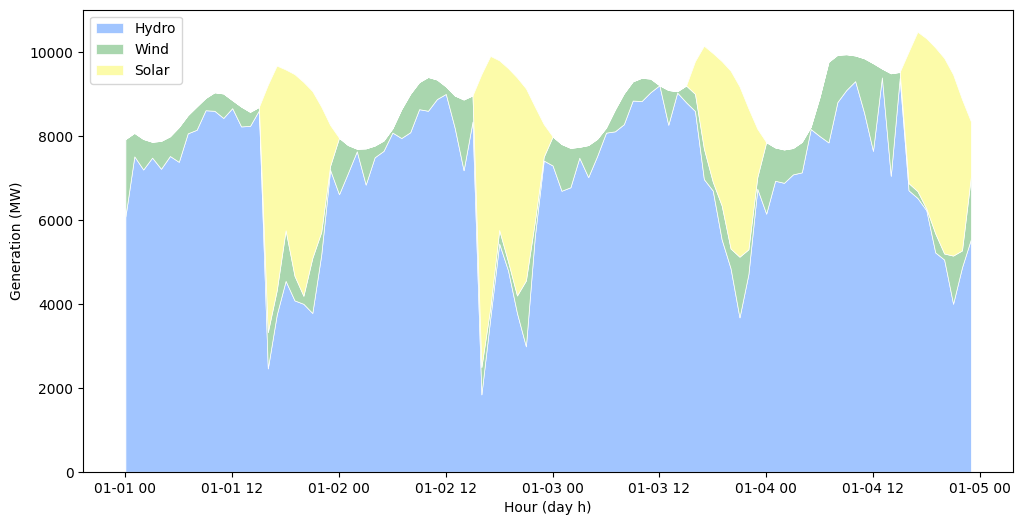

In [37]:
#Stacked area chart for hourly dispatch

hourly_dispatch = pd.read_excel(scenario,sheet_name='Total Dispatch' , index_col=0)
hourly_dispatch = hourly_dispatch.drop('total', axis=0)
if 'cascade' in hourly_dispatch.columns:
    hourly_dispatch.hydro = hourly_dispatch.hydro + hourly_dispatch.cascade
    hourly_dispatch = hourly_dispatch.drop('cascade', axis=1)

hourly_dispatch = hourly_dispatch.drop('NG', axis=1)
hourly_dispatch = hourly_dispatch.iloc[0:96]

fig, ax = plt.subplots(figsize=(12,6))
ax.stackplot(hourly_dispatch.index, hourly_dispatch.values.T, labels=[gen_types[key] for key in list(hourly_dispatch.columns)], colors=[colors[keyc] for keyc in list(hourly_dispatch.columns)]
             , baseline='zero', lw=0.5, edgecolor='white')
ax.set(xlabel='Hour (day h)', ylabel='Generation (MW)')
ax.legend(loc='upper left')

plt.savefig(f'{scenario.split(".")[0]}_hourly_dispatch.png', dpi=300, bbox_inches='tight')
plt.show()